In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load the CSV file without header
df = pd.read_csv('network-metrics.csv', header=None)

# Define the new column names
column_names = ["who", "color", "hierarchy", "polity", "degree", "clustering-coeff", "resources"]

# Assign the column names to the dataframe
df.columns = column_names

# Save the updated dataframe back to a CSV file
df.to_csv('Network_metrics_withHeaders.csv', index=False)


### Loading and Cleaning Data

In [32]:
df

,who,color,hierarchy,polity,degree,clustering-coeff,resources
0,697,105,0,(turtle 317),10,0.088889,4.659023e+12
1,503,105,0,(turtle 317),17,0.029412,2.764315e+12
2,520,105,0,(turtle 317),13,0.038462,3.772785e+12
3,570,105,0,(turtle 317),15,0.000000,3.194652e+12
4,556,105,0,(turtle 317),12,0.090909,2.775441e+12
...,...,...,...,...,...,...,...
995,371,105,0,(turtle 317),17,0.051471,2.963590e+12
996,514,105,0,(turtle 317),13,0.102564,3.373612e+12
997,635,105,0,(turtle 317),19,0.040936,2.928687e+12
998,284,105,0,(turtle 317),13,0.076923,2.495392e+12


## C(k) vs K

### Power Law Distribution

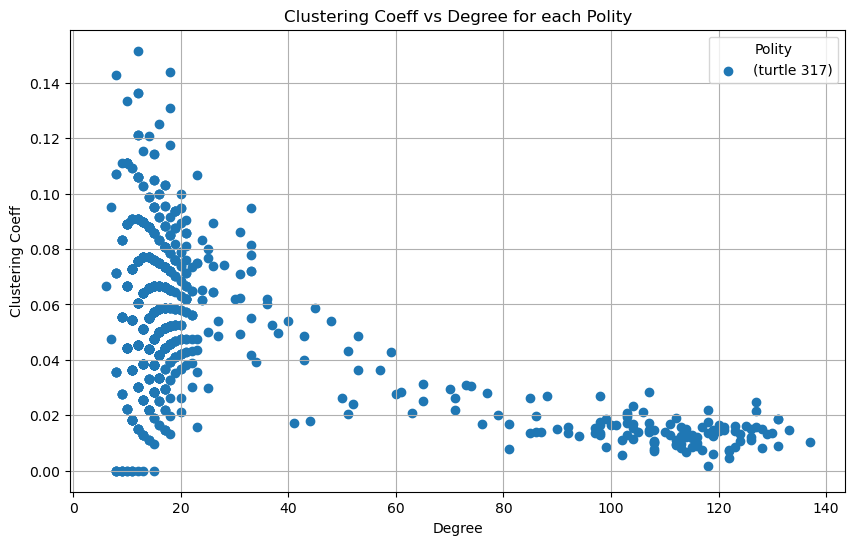

In [33]:
df_sorted = df.sort_values(by="polity")# Sort the data by "polity"

# Group the data by "polity"
groups = df_sorted.groupby("polity")

# Plot "Clustering Coeff" vs "degree" for each polity
plt.figure(figsize=(10, 6))

for name, group in groups:
    plt.scatter(group["degree"], group["clustering-coeff"], label=name)

plt.xlabel("Degree")
plt.ylabel("Clustering Coeff")
plt.title("Clustering Coeff vs Degree for each Polity")
plt.legend(title="Polity")
plt.grid(True)
plt.show()

### Hubs (Tail-end of distribution)

In [34]:
import pandas as pd
import numpy as np

# Assuming df is the DataFrame with columns 'polity', 'degree', and 'clustering-coeff'

# Define a function to identify nodes at the tail of the power-law distribution
def identify_tail_nodes(df, tail_fraction=0.05):
    # Sort the DataFrame by degree in descending order
    df_sorted = df.sort_values(by="degree", ascending=False)
    
    # Calculate the number of nodes in the tail
    tail_count = int(len(df) * tail_fraction)
    
    # Extract the nodes at the tail
    tail_nodes = df_sorted.head(tail_count)
    
    return tail_nodes

# Identify the tail nodes
tail_nodes = identify_tail_nodes(df)

# Display the list of tail nodes
print(tail_nodes)

     who  color  hierarchy        polity  degree  clustering-coeff  \
107   44    105        134  (turtle 317)     137          0.010412   
33   381    105        137  (turtle 317)     133          0.014582   
375  507    105        133  (turtle 317)     131          0.008925   
75   838    105        129  (turtle 317)     131          0.018790   
782  361    105        134  (turtle 317)     131          0.018673   
704  341    105        133  (turtle 317)     130          0.013596   
538  930    105        130  (turtle 317)     129          0.013081   
14   781    105        126  (turtle 317)     128          0.014887   
443  863    105        134  (turtle 317)     128          0.008120   
681  606    105        129  (turtle 317)     127          0.021372   
219   85    105        119  (turtle 317)     127          0.024747   
789  357    105        126  (turtle 317)     127          0.015623   
971  283    105        133  (turtle 317)     126          0.011048   
244  800    105     

In [35]:
len(tail_nodes)

50

In [36]:
tail_nodes.sort_values(by="hierarchy", ascending=False)

,who,color,hierarchy,polity,degree,clustering-coeff,resources
33,381,105,137,(turtle 317),133,0.014582,5.931651e+13
107,44,105,134,(turtle 317),137,0.010412,5.835613e+11
782,361,105,134,(turtle 317),131,0.018673,5.356821e+11
443,863,105,134,(turtle 317),128,0.008120,6.394804e+11
375,507,105,133,(turtle 317),131,0.008925,2.716819e+11
704,341,105,133,(turtle 317),130,0.013596,2.242106e+11
971,283,105,133,(turtle 317),126,0.011048,2.543795e+11
458,205,105,130,(turtle 317),124,0.013375,1.409711e+11
538,930,105,130,(turtle 317),129,0.013081,1.071323e+11
65,106,105,130,(turtle 317),122,0.004471,1.027703e+11


## Conclusive Test for Hierarchy, Log C(k) vs Log K

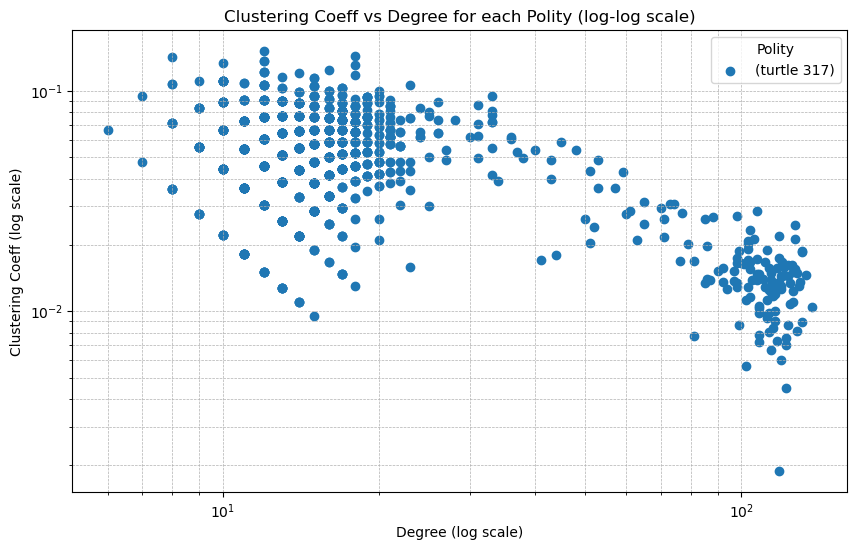

In [37]:
plt.figure(figsize=(10, 6))

for name, group in groups:
    plt.scatter(group["degree"], group["clustering-coeff"], label=name)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (log scale)")
plt.ylabel("Clustering Coeff (log scale)")
plt.title("Clustering Coeff vs Degree for each Polity (log-log scale)")
plt.legend(title="Polity")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

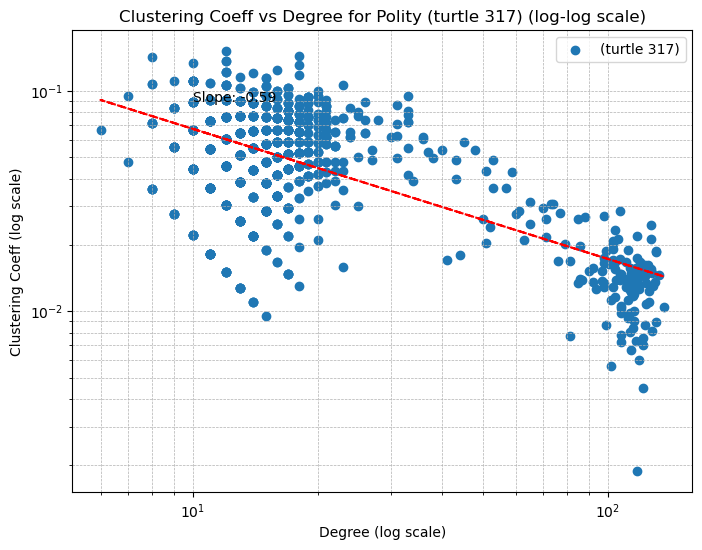

In [38]:
# Sort the data by "polity"
df_sorted = df.sort_values(by="polity")

# Group the data by "polity"
groups = df_sorted.groupby("polity")

# Perform linear regression and plot for each polity
for name, group in groups:
    # Filter out non-positive clustering coefficients
    group = group[group["clustering-coeff"] > 0]

    # Create a new plot for each polity
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(group["degree"], group["clustering-coeff"], label=name)

    # Perform linear regression on log-transformed data
    x = np.log(group["degree"].values.reshape(-1, 1))
    y = np.log(group["clustering-coeff"].values.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x, y)

    # Get slope and intercept
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    # Plot the regression line
    plt.plot(group["degree"], np.exp(model.predict(x)), color='red', linestyle='--')

    # Annotate the slope on the plot
    plt.text(group["degree"].iloc[0], group["clustering-coeff"].iloc[0], f"Slope: {slope:.2f}", fontsize=10)

    # Set plot properties
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Clustering Coeff (log scale)")
    plt.title(f"Clustering Coeff vs Degree for Polity {name} (log-log scale)")
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)

    # Show plot for the current polity
    plt.show()

In [39]:
# Check the distribution of clustering coefficient values
print(df["clustering-coeff"].describe())

# Count the number of non-positive values
non_positive_count = (df["clustering-coeff"] <= 0).sum()
print(f"Number of non-positive clustering coefficient values: {non_positive_count}")

count    1000.000000
mean        0.053007
std         0.027170
min         0.000000
25%         0.033333
50%         0.052592
75%         0.071970
max         0.151515
Name: clustering-coeff, dtype: float64
Number of non-positive clustering coefficient values: 16


## Loading Graph Data

In [40]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

# Load the CSV file, considering the first row and column as headers
file_path = r'C:\\Users\\ameiy\\Documents\\3_Intern_Current\\IIST\\Experiments\\Turchin_Variation\\adjacency-matrix.csv'
data = pd.read_csv(file_path, header=None)

# Extract headers
headers = data.iloc[0, 1:].to_list()
data = data.iloc[1:, 1:]

# Ensure the data is 1000x1000
if data.shape[0] != 1000 or data.shape[1] != 1000:
    raise ValueError("The CSV file does not contain a 1000x1000 matrix.")

# Convert the DataFrame to a numpy matrix
matrix = data.to_numpy()
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Check for correctness in data conversion (Graph-Matrix)

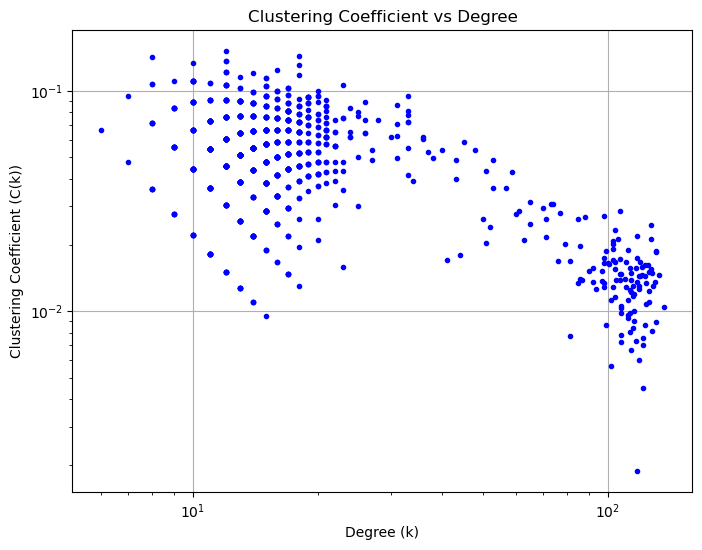

In [41]:
# Create a graph from the adjacency matrix with node labels
G = nx.from_numpy_array(matrix)
mapping = {i: headers[i] for i in range(len(headers))}
G = nx.relabel_nodes(G, mapping)

# Calculate degree of each node
degrees = dict(G.degree())

# Calculate clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

# Prepare data for log-log plot
degree_sequence = [degrees[node] for node in G.nodes()]
clustering_sequence = [clustering_coefficients[node] for node in G.nodes()]

# Plot log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(degree_sequence, clustering_sequence, 'bo', markersize=3)
plt.title('Clustering Coefficient vs Degree')
plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient (C(k))')
plt.grid(True)
plt.show()

In [42]:
degrees 

{189.0: 15,
 62.0: 17,
 569.0: 15,
 620.0: 17,
 947.0: 108,
 733.0: 19,
 434.0: 113,
 704.0: 15,
 160.0: 13,
 265.0: 16,
 641.0: 13,
 880.0: 10,
 366.0: 14,
 856.0: 16,
 99.0: 16,
 414.0: 19,
 933.0: 19,
 638.0: 19,
 328.0: 124,
 584.0: 103,
 688.0: 12,
 690.0: 13,
 248.0: 12,
 357.0: 127,
 45.0: 13,
 118.0: 19,
 63.0: 16,
 908.0: 17,
 811.0: 23,
 955.0: 12,
 38.0: 16,
 391.0: 13,
 444.0: 12,
 574.0: 9,
 251.0: 20,
 134.0: 15,
 920.0: 117,
 618.0: 14,
 855.0: 11,
 937.0: 98,
 825.0: 13,
 780.0: 14,
 10.0: 15,
 693.0: 14,
 495.0: 16,
 942.0: 12,
 754.0: 16,
 656.0: 15,
 629.0: 19,
 887.0: 16,
 709.0: 16,
 993.0: 16,
 40.0: 20,
 338.0: 15,
 491.0: 12,
 370.0: 33,
 334.0: 18,
 96.0: 18,
 157.0: 15,
 701.0: 12,
 480.0: 14,
 611.0: 17,
 775.0: 18,
 832.0: 13,
 141.0: 17,
 623.0: 18,
 325.0: 11,
 896.0: 23,
 228.0: 98,
 330.0: 37,
 436.0: 14,
 573.0: 92,
 104.0: 16,
 457.0: 13,
 608.0: 19,
 379.0: 21,
 375.0: 23,
 949.0: 22,
 377.0: 17,
 777.0: 99,
 522.0: 15,
 22.0: 85,
 416.0: 11,
 978.0: 

In [43]:
matrix.shape

(1000, 1000)

In [44]:
G

### Visualisation

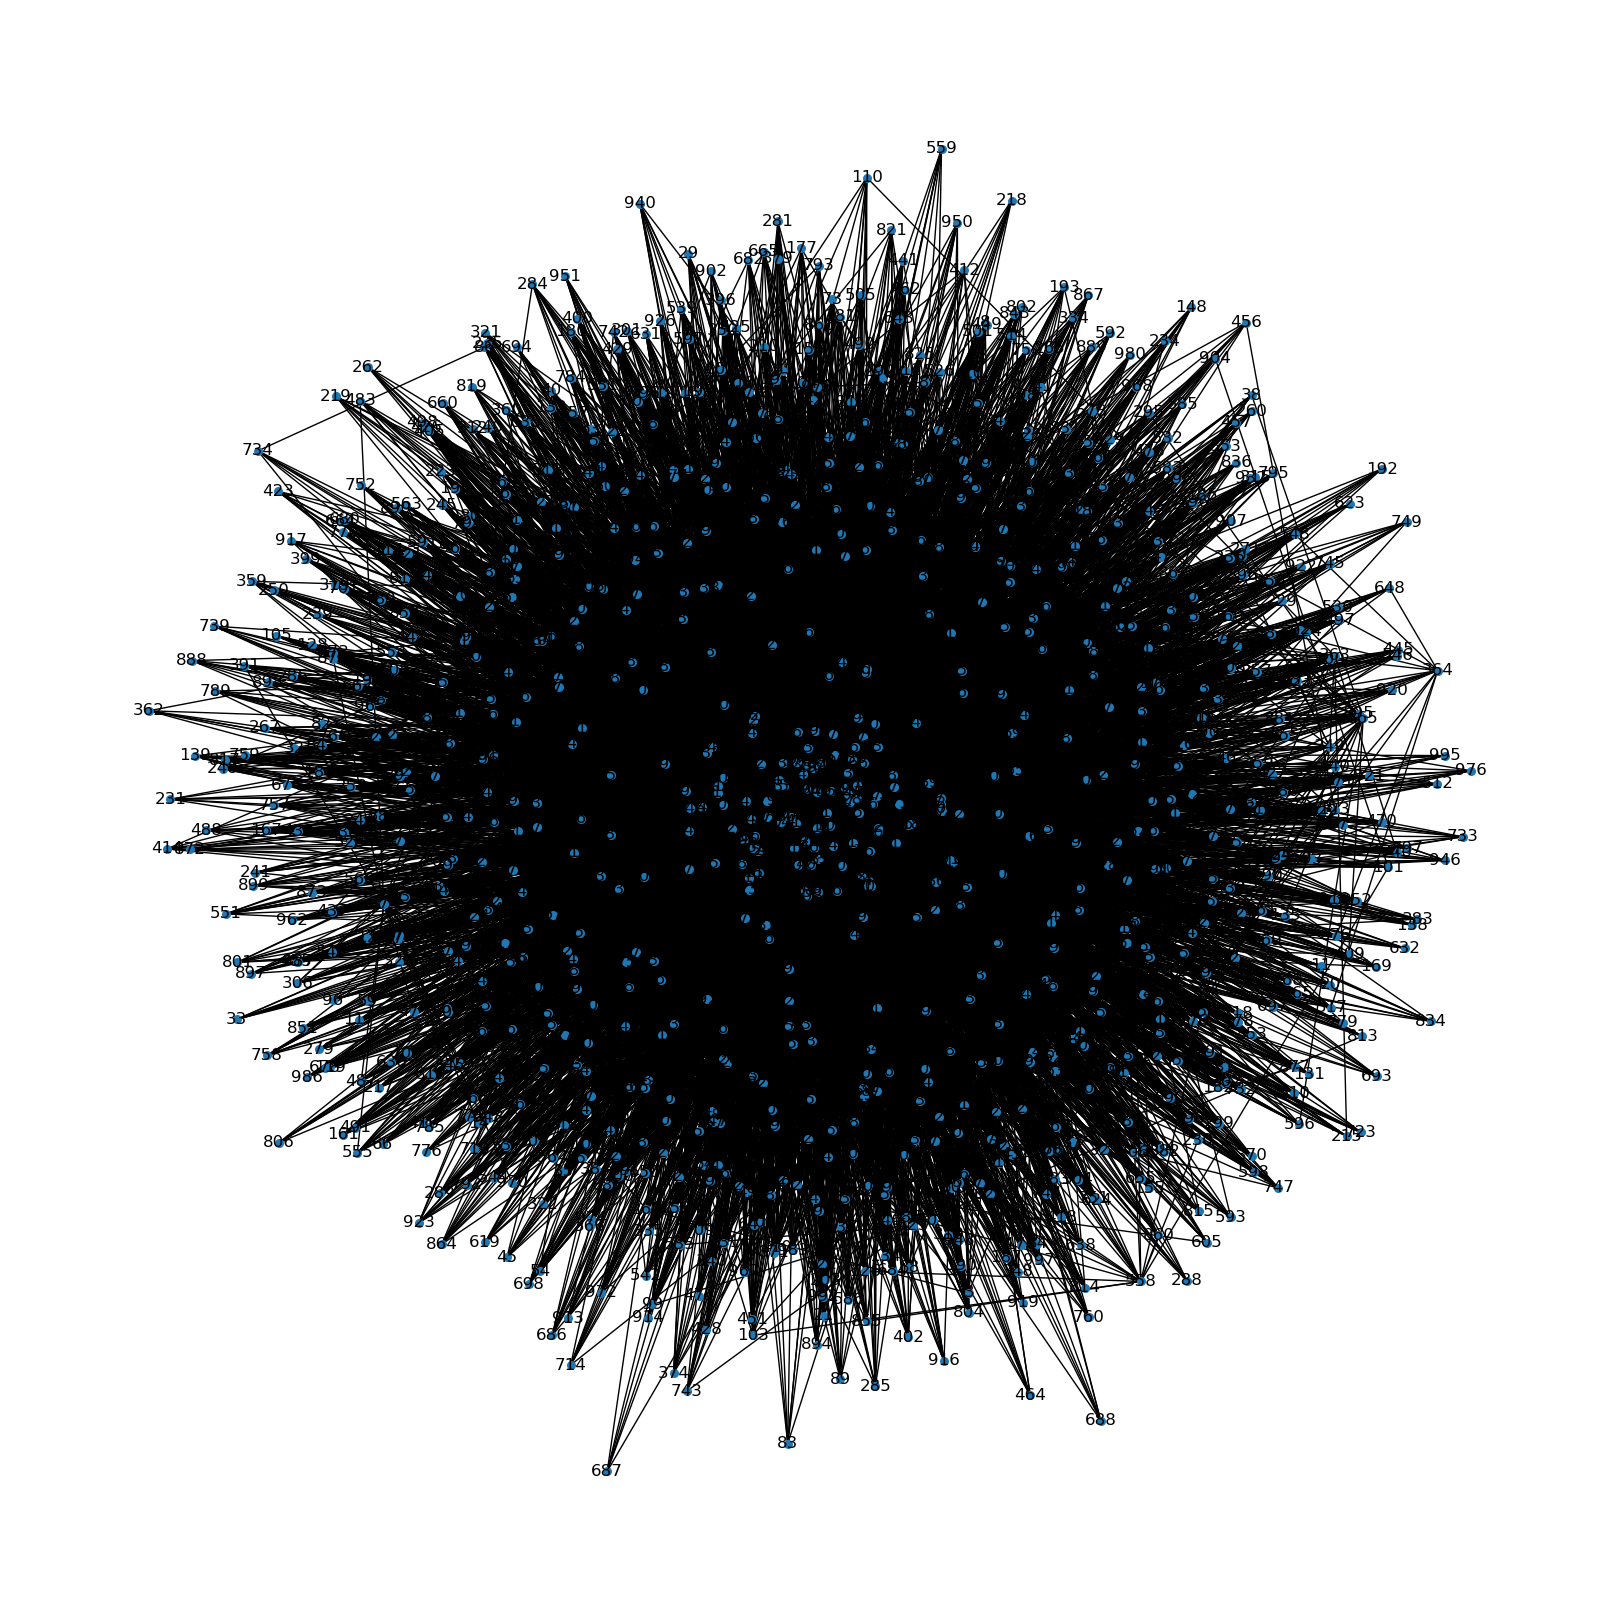

In [45]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(matrix)

# Draw the graph
plt.figure(figsize=(16, 16))
nx.draw(G, node_size=30, with_labels=True)
plt.show()

## Graph Level Properties

- Algebraic Connectivity
- Natural Connectivity
- Trphic Coherence
- Assortativity Coefficient
- Modularity
- Variance of Node Betweeness
- Variance of Edge Betweeness
- Global Reaching Centrality
- Maximum Reaching Centrality

In [46]:
import numpy as np
import networkx as nx
from scipy.linalg import eigvals
from networkx.algorithms.assortativity import degree_assortativity_coefficient

# Algebraic Connectivity (AC)
def algebraic_connectivity(adjacency_matrix):
    N = adjacency_matrix.shape[0]
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    laplacian_matrix = degree_matrix - adjacency_matrix
    eigenvalues = np.sort(np.linalg.eigvals(laplacian_matrix))
    return eigenvalues[1].real  # The second smallest eigenvalue

# Natural Connectivity (NaC)
def natural_connectivity(adjacency_matrix):
    eigenvalues = eigvals(adjacency_matrix)
    exp_eigenvalues = np.exp(eigenvalues)
    nac = np.log(np.sum(exp_eigenvalues) / len(eigenvalues))
    return nac.real

# Trophic Coherence
def trophic_coherence(adjacency_matrix):
    N = adjacency_matrix.shape[0]
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    laplacian_matrix = degree_matrix - adjacency_matrix
    eigenvalues = np.linalg.eigvals(laplacian_matrix)
    trophic_coherence = np.sum(eigenvalues**2) / N
    return trophic_coherence.real

# Assortativity Coefficient
def assortativity_coefficient(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    return degree_assortativity_coefficient(G)

# Modularity
def modularity(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    partition = list(nx.algorithms.community.greedy_modularity_communities(G))
    modularity_value = nx.algorithms.community.modularity(G, partition)
    return modularity_value

# Variance of Node Betweenness
def variance_node_betweenness(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    node_betweenness = nx.betweenness_centrality(G).values()
    return np.var(list(node_betweenness))

# Variance of Link Betweenness
def variance_link_betweenness(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    link_betweenness = nx.edge_betweenness_centrality(G).values()
    return np.var(list(link_betweenness))

# Global Reaching Centrality
def global_reaching_centrality(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    local_reaching_centralities = []
    for node in G.nodes():
        reachable_nodes = nx.single_source_shortest_path_length(G, node)
        local_reaching_centrality = sum(reachable_nodes.values()) / ((len(G) - 1) * (len(G) - 1))
        local_reaching_centralities.append(local_reaching_centrality)
    max_local_reaching_centrality = max(local_reaching_centralities)
    return sum(max_local_reaching_centrality - r for r in local_reaching_centralities) / (len(G) - 1)


# Maximum Betweenness Centrality
def maximum_betweenness_centrality(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    node_betweenness = nx.betweenness_centrality(G)
    return max(node_betweenness.values())

# usage
adjacency_matrix = matrix

# Calculate the metrics
ac = algebraic_connectivity(adjacency_matrix)
nac = natural_connectivity(adjacency_matrix)
tc = trophic_coherence(adjacency_matrix)
ac_coeff = assortativity_coefficient(adjacency_matrix)
mod = modularity(adjacency_matrix)
var_node_betweenness = variance_node_betweenness(adjacency_matrix)
var_link_betweenness = variance_link_betweenness(adjacency_matrix)
grc = global_reaching_centrality(adjacency_matrix)
max_bc = maximum_betweenness_centrality(adjacency_matrix)

print(f"Algebraic Connectivity (AC): {ac}")
print(f"Natural Connectivity (NaC): {nac}")
print(f"Trophic Coherence: {tc}")
print(f"Assortativity Coefficient: {ac_coeff}")
print(f"Modularity: {mod}")
print(f"Variance of Node Betweenness: {var_node_betweenness}")
print(f"Variance of Link Betweenness: {var_link_betweenness}")
print(f"Global Reaching Centrality: {grc}")
print(f"Maximum Betweenness Centrality: {max_bc}")


Algebraic Connectivity (AC): 5.905655043092857
Natural Connectivity (NaC): 35.95017029582635
Trophic Coherence: 1653.7640000000022
Assortativity Coefficient: -0.7954170207798372
Modularity: 0.1462198858430131
Variance of Node Betweenness: 8.333790592720054e-06
Variance of Link Betweenness: 5.589330598790878e-09
Global Reaching Centrality: 0.0003895595102417542
Maximum Betweenness Centrality: 0.014563657603500417


## Node Level Properties

- Betweeness Centrality
- Closeness Centrality
- Degree Centrality
- EigenVector Centrality
- Local Reaching Centrality
- Trophic Level of Vertices

In [47]:
# Node-wise properties

# Local Reaching Centrality
def local_reaching_centrality(adjacency_matrix, node):
    G = nx.from_numpy_array(adjacency_matrix)
    reachable_nodes = nx.single_source_shortest_path_length(G, node)
    local_reaching_centrality = sum(reachable_nodes.values()) / ((len(G) - 1) * (len(G) - 1))
    return local_reaching_centrality

def node_properties(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    properties = {}
    
    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    
    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G)
    
    # Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    
    # Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
    
    # Local Reaching Centrality
    local_reaching_centralities = {node: local_reaching_centrality(adjacency_matrix, node) for node in G.nodes()}
    
    for node in G.nodes():
        properties[node] = {
            'Betweenness Centrality': betweenness_centrality[node],
            'Closeness Centrality': closeness_centrality[node],
            'Degree Centrality': degree_centrality[node],
            'Eigenvector Centrality': eigenvector_centrality[node],
            'Local Reaching Centrality': local_reaching_centralities[node]
        }
    
    return properties

# Trophic Levels
def trophic_levels(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
    S = np.zeros(G.number_of_nodes())
    for node in G.nodes():
        predecessors = list(G.predecessors(node))
        if predecessors:
            S[node] = 1 + np.mean([S[pred] for pred in predecessors])
    return S

node_props = node_properties(adjacency_matrix)
trophic_levels = trophic_levels(adjacency_matrix)

print("\nNode-wise properties:")
for node, props in node_props.items():
    print(f"Node {node}:")
    for prop, value in props.items():
        print(f"  {prop}: {value}")

print("\nTrophic Levels of Vertices:")
for node, level in enumerate(trophic_levels):
    print(f"Node {node}: Trophic Level: {level}")


Node-wise properties:
Node 0:
  Betweenness Centrality: 0.0001328902620390228
  Closeness Centrality: 0.4553327256153145
  Degree Centrality: 0.015015015015015015
  Eigenvector Centrality: 0.022242221493748056
  Local Reaching Centrality: 0.0021983945907869834
Node 1:
  Betweenness Centrality: 0.00013854893830358427
  Closeness Centrality: 0.4705605275553462
  Degree Centrality: 0.017017017017017015
  Eigenvector Centrality: 0.027710673299638805
  Local Reaching Centrality: 0.0021272523775026277
Node 2:
  Betweenness Centrality: 0.00014629908300060917
  Closeness Centrality: 0.45616438356164385
  Degree Centrality: 0.015015015015015015
  Eigenvector Centrality: 0.021048113169471874
  Local Reaching Centrality: 0.002194386578770963
Node 3:
  Betweenness Centrality: 0.00024988038560482196
  Closeness Centrality: 0.45081227436823107
  Degree Centrality: 0.017017017017017015
  Eigenvector Centrality: 0.020731090844666223
  Local Reaching Centrality: 0.0022204386568750933
Node 4:
  Between

In [48]:
# Create DataFrame
measure_data = []
for node, props in node_props.items():
    props['Node'] = node
    props['Label'] = mapping[node]
    props['Trophic Level'] = trophic_levels[node]
    measure_data.append(props)

measures_df = pd.DataFrame(measure_data)
measures_df = measures_df[['Node', 'Label', 'Betweenness Centrality', 'Closeness Centrality', 'Degree Centrality', 'Eigenvector Centrality', 'Local Reaching Centrality', 'Trophic Level']]

# Display DataFrame
print("\nNode-wise properties and Trophic Levels in DataFrame:")
print(measures_df)


Node-wise properties and Trophic Levels in DataFrame:
     Node  Label  Betweenness Centrality  Closeness Centrality  \
0       0  189.0                0.000133              0.455333   
1       1   62.0                0.000139              0.470561   
2       2  569.0                0.000146              0.456164   
3       3  620.0                0.000250              0.450812   
4       4  947.0                0.009244              0.469455   
..    ...    ...                     ...                   ...   
995   995  331.0                0.000026              0.419044   
996   996  956.0                0.000081              0.446580   
997   997   26.0                0.000095              0.448989   
998   998  188.0                0.000206              0.484481   
999   999  994.0                0.000164              0.464219   

     Degree Centrality  Eigenvector Centrality  Local Reaching Centrality  \
0             0.015015                0.022242                   0.002198  

## Miscellaneous Properties
- Dominating Set
- Maximal Independent Set
- Non-Randomness of Graph vs Non-Randomness of ER graph
- Check for Tree or Forest structure
- Rich Club Coefficient and Set

In [49]:
import networkx as nx

x = nx.dominating_set(G, start_with=None)
print("Dominating Set: ", x, "\n", "Size of set: ", len(x))

y = nx.maximal_independent_set(G, nodes=None, seed=None)
print("Maximal Independent Set: ", y, "\n", "Size of set: ", len(y))

z = nx.non_randomness(G)
print("Non-Randomness of Hierarchy Graph: ",z, "\n", "Number of Edges in graph: ",
G.number_of_edges())

# Create a graph (e.g., a random graph)
G_er = nx.erdos_renyi_graph(1000, 0.05)
# Calculate non-randomness
w = nx.non_randomness(G_er)
print("Non-Randomness of ER Graph: ",w, "\n", "Number of Edges in ER graph: ",
G_er.number_of_edges())


print("Is Tree or Forest: ", nx.is_tree(G), nx.is_forest(G))


rc = nx.rich_club_coefficient(G, normalized=False, seed=41)
print("Rich Club Set: ", rc, "\n", "Size of set: ", len(rc))



Dominating Set:  {0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 24, 25, 26, 29, 30, 31, 32, 33, 34, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 69, 70, 72, 73, 74, 75, 76, 77, 78, 82, 83, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 110, 112, 113, 114, 116, 118, 119, 120, 121, 122, 124, 126, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 145, 148, 149, 151, 155, 156, 157, 158, 159, 160, 161, 162, 164, 166, 167, 169, 170, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 196, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 210, 211, 212, 215, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 236, 238, 239, 241, 242, 243, 244, 246, 247, 248, 251, 252, 253, 254, 255, 256, 257, 259, 260, 262, 264, 265, 266, 267, 268, 271, 272, 273, 275, 276, 278, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 293, 295, 296,

In [50]:
# G_max_branch = nx.maximum_branching(G)
# # Draw the graph
# plt.figure(figsize=(6,6))
# nx.draw(G_max_branch, node_size=30, with_labels=True)
# plt.show()

- Hierarchical Levels of Nodes
- Democracy Coefficient (Graph Level)
- Influence Centrality (Node level)
- Hierarchical Incoherence (Graph Level)

In [51]:
import networkx as nx
import numpy as np
from scipy.linalg import lstsq

# Function to compute the hierarchical levels
def hierarchical_levels(G):
    A = nx.adjacency_matrix(G).todense()
    L = np.diag(np.sum(A, axis=1)) - A  # In-degree Laplacian
    M = L.T
    d = np.sum(A, axis=1)
    
    # Solve Mx = d using least squares
    g, _, _, _ = lstsq(M, d)
    return g

# Function to compute the democracy coefficient
def democracy_coefficient(G):
    A = nx.adjacency_matrix(G).todense()
    L = np.diag(np.sum(A, axis=1)) - A  # In-degree Laplacian
    M = L.T
    d = np.sum(A, axis=1)
    
    g = hierarchical_levels(G)
    
    # Democracy coefficient calculation
    dc_forward = np.std(g) / np.mean(g)
    return dc_forward

# Function to compute the influence centrality
def influence_centrality(G):
    g = hierarchical_levels(G)
    centrality = {node: level for node, level in zip(G.nodes(), g)}
    return centrality

# Function to compute hierarchical incoherence
def hierarchical_incoherence(G):
    g = hierarchical_levels(G)
    incoherence = np.var(g)
    return incoherence

# Example graph
G = nx.from_numpy_array(adjacency_matrix)

values_hierarchical_levels = hierarchical_levels(G)
values_democracy_coefficient = democracy_coefficient(G)
values_influence_centrality = influence_centrality(G)
values_hierarchical_incoherence = hierarchical_incoherence(G)
# Calculate metrics
print("Hierarchical Levels:", values_hierarchical_levels)
print("Democracy Coefficient:", values_democracy_coefficient)
print("Influence Centrality:", values_influence_centrality)
print("Hierarchical Incoherence:", values_hierarchical_incoherence)


Hierarchical Levels: [-3.52724112e-03  2.46660464e-01 -5.25735003e-02  4.75278588e-02
  8.19807493e-01  3.90252391e-01  7.91539226e-01  2.63554573e-02
 -3.08922074e-01  6.79095386e-02 -3.58259294e-01 -8.92202385e-01
 -1.38419565e-01  1.62616196e-01  1.07028969e-01  4.06261419e-01
  1.05669757e-01  3.85466257e-01  8.13955629e-01  8.16644354e-01
 -4.47176018e-01 -2.47596543e-01 -4.30379755e-01  8.33339417e-01
 -2.86390732e-01  3.93860130e-01  7.72167223e-02  1.84602313e-01
  4.95086557e-01 -4.78403673e-01  1.26711714e-01 -2.58839576e-01
 -4.14180967e-01 -1.14686044e+00  4.37016954e-01  8.82230661e-03
  7.84282911e-01 -1.36067728e-01 -6.84594315e-01  7.74362459e-01
 -2.63182769e-01 -1.76113623e-01  1.68799999e-02 -1.94265738e-01
  1.27276605e-01 -4.79395456e-01  9.33110393e-02 -8.29604473e-03
  3.51187528e-01  9.87678454e-02  3.68605215e-02  1.45429292e-01
  4.33971735e-01 -3.39548355e-02 -4.80400675e-01  6.48861481e-01
  2.24415057e-01  3.31954275e-01  2.05648025e-02 -4.84742743e-01
 -1.

In [52]:
import networkx as nx
import numpy as np
import pandas as pd

# Function to compute the k-shell decomposition
def k_shell_decomposition(G):
    return nx.core_number(G)

# Function to compute the democracy coefficient
def democracy_coefficient(k_shell_indices):
    values = np.array(list(k_shell_indices.values()))
    dc = np.std(values) / np.mean(values)
    return dc

# Function to compute the influence centrality
def influence_centrality(k_shell_indices):
    return k_shell_indices

# Function to compute hierarchical incoherence
def hierarchical_incoherence(k_shell_indices):
    values = np.array(list(k_shell_indices.values()))
    incoherence = np.var(values)
    return incoherence

# Example graph
adjacency_matrix = matrix
G = nx.from_numpy_array(adjacency_matrix)

# Calculate k-shell decomposition
k_shell_indices = k_shell_decomposition(G)

# Calculate metrics based on k-shell indices
values_democracy_coefficient = democracy_coefficient(k_shell_indices)
values_influence_centrality = influence_centrality(k_shell_indices)
values_hierarchical_incoherence = hierarchical_incoherence(k_shell_indices)

print("K-shell Decomposition:", k_shell_indices)
print("Democracy Coefficient:", values_democracy_coefficient)
print("Influence Centrality:", values_influence_centrality)
print("Hierarchical Incoherence:", values_hierarchical_incoherence)

# Create DataFrame
data = []
for node, k_shell_index in k_shell_indices.items():
    data.append({
        'Node': node,
        'K-shell Index': k_shell_index,
        'Influence Centrality': k_shell_index
    })

df = pd.DataFrame(data)
df = df[['Node', 'K-shell Index', 'Influence Centrality']]
df['Label'] = df['Node'].map(mapping)

# Display DataFrame
print("\nNode-wise properties in DataFrame:")
(df)


K-shell Decomposition: {0: 15, 1: 17, 2: 15, 3: 16, 4: 18, 5: 18, 6: 18, 7: 15, 8: 13, 9: 16, 10: 13, 11: 10, 12: 14, 13: 16, 14: 16, 15: 18, 16: 16, 17: 18, 18: 18, 19: 18, 20: 12, 21: 13, 22: 12, 23: 18, 24: 13, 25: 18, 26: 15, 27: 16, 28: 18, 29: 12, 30: 16, 31: 13, 32: 12, 33: 9, 34: 18, 35: 15, 36: 18, 37: 14, 38: 11, 39: 18, 40: 13, 41: 14, 42: 15, 43: 13, 44: 16, 45: 12, 46: 16, 47: 15, 48: 18, 49: 16, 50: 15, 51: 16, 52: 18, 53: 15, 54: 12, 55: 18, 56: 17, 57: 18, 58: 15, 59: 12, 60: 14, 61: 17, 62: 16, 63: 13, 64: 17, 65: 18, 66: 11, 67: 14, 68: 18, 69: 18, 70: 14, 71: 18, 72: 16, 73: 13, 74: 18, 75: 18, 76: 18, 77: 18, 78: 17, 79: 18, 80: 15, 81: 18, 82: 11, 83: 8, 84: 13, 85: 18, 86: 11, 87: 18, 88: 14, 89: 11, 90: 15, 91: 18, 92: 18, 93: 13, 94: 18, 95: 15, 96: 11, 97: 16, 98: 14, 99: 12, 100: 16, 101: 11, 102: 17, 103: 13, 104: 16, 105: 11, 106: 18, 107: 17, 108: 18, 109: 18, 110: 10, 111: 17, 112: 15, 113: 15, 114: 13, 115: 18, 116: 18, 117: 11, 118: 16, 119: 10, 120: 16,

,Node,K-shell Index,Influence Centrality,Label
0,0,15,15,189.0
1,1,17,17,62.0
2,2,15,15,569.0
3,3,16,16,620.0
4,4,18,18,947.0
...,...,...,...,...
995,995,8,8,331.0
996,996,12,12,956.0
997,997,13,13,26.0
998,998,18,18,188.0


In [53]:
print(len(values_influence_centrality) , len(values_hierarchical_levels))

1000 1000


In [54]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 